# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.datasets as DT
import numpy.random as rd


C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ruben\AppData\Local\Conti

In [2]:
import tensorflow as tf

In [4]:
tf.__version__

'1.14.0'

## Import Data

In [5]:
(X1,y1),(X2,y2)=DT.fashion_mnist.load_data()
print('Training set:',X1.shape,X1.dtype)
print('Test set:    ',X2.shape,X2.dtype)


Training set: (60000, 28, 28) uint8
Test set:     (10000, 28, 28) uint8


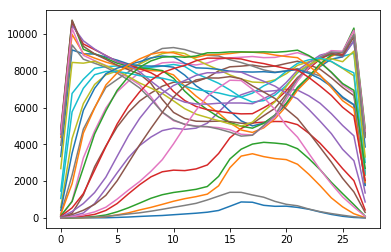

In [6]:
#quiz
v = np.var(X1)
v.shape


v = np.var(X1, axis=0) ## correct
v.shape
plt.plot(v)

### View some images

(-0.5, 619.5, 309.5, -0.5)

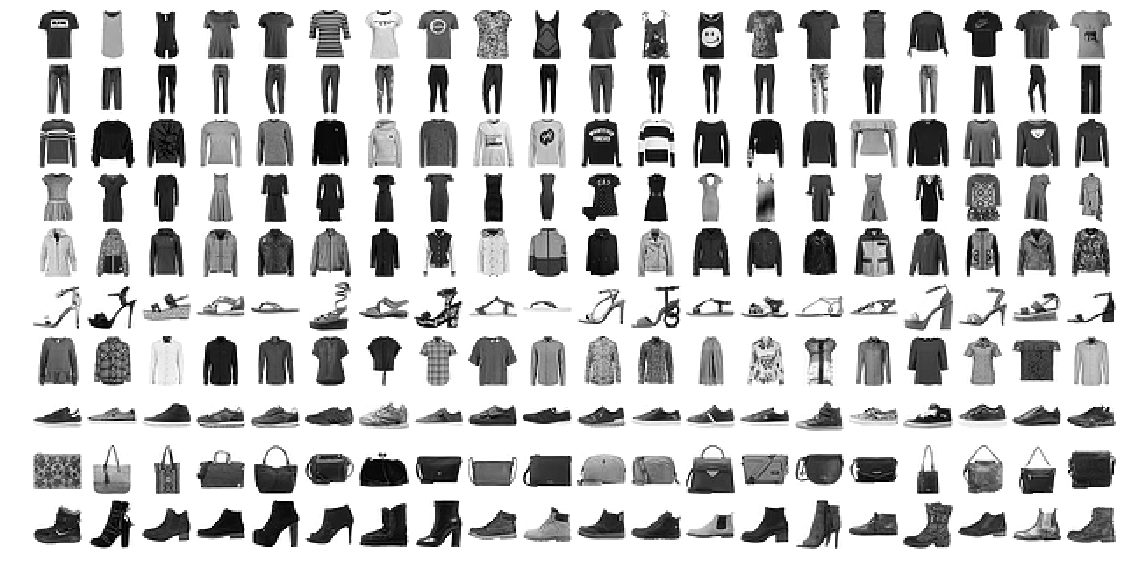

In [9]:
idxList=[]
for i in range(10):
    idxTemp=np.argwhere(y1==i).squeeze()
    idxList.append(idxTemp)


for i in range(10):
    idx=idxList[i]
    for n in range(20):
        if n==0:
            Img=np.hstack((255-X1[idx[n]], np.ones((28,3))*255))
            #Img=np.hstack((255-Xtrain[idx[1]], np.ones((28,3))*255))
        else:
            Img=np.hstack((Img,255-X1[idx[n]],np.ones((28,3))*255))

    
    if i==0:
        ImgT=np.vstack((Img,np.ones((3,Img.shape[1]))*255))
    else:
        ImgT=np.vstack((ImgT,Img,np.ones((3,Img.shape[1]))*255))
    
    
plt.figure(figsize=(20,10))
plt.imshow(ImgT,cmap='gray')
plt.axis('off')


## Shuffle training set and sort test set

In [10]:
idx=rd.permutation(X1.shape[0])
X1=X1[idx]
y1=y1[idx]

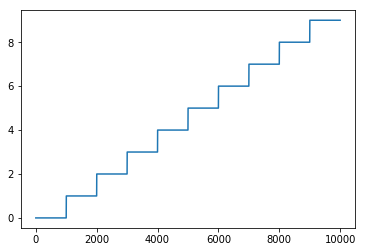

In [11]:
idx=np.argsort(y2)
y2=y2[idx]
X2=X2[idx]
plt.plot(y2)


## Images must be in vector format (make sure that data is in "float" format)

In [12]:
X1=X1.reshape((60000,28**2))*1.
X2=X2.reshape((X2.shape[0],28**2))*1.
print('Training set:',X1.shape,X1.dtype)
print('Test set:    ',X2.shape,X2.dtype)


Training set: (60000, 784) float64
Test set:     (10000, 784) float64


## Train, predict and check confusion matrix - use SGDClassifier (try others)

In [13]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier().fit(X1,y1)
y2e=sgd.predict(X2)

In [14]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y2,y2e))
print('Total number of erros %d (in %d)'%(np.sum(y2!=y2e),X2.shape[0]))

[[776   3   5   3  15   0 187   0  10   1]
 [ 16 923   3   8  23   0  22   1   3   1]
 [ 18   1 592   0 181   0 198   0  10   0]
 [131  10  22 391 151   0 273   1  15   6]
 [  0   0  58   0 793   1 146   0   2   0]
 [  3   0   0   0   0 889   3  47  11  47]
 [112   1  75   1 107   0 677   0  27   0]
 [  0   0   0   0   0  33   0 936   1  30]
 [  8   1   7   2   8   5  38   5 925   1]
 [  0   0   2   0   0  19   3  37   0 939]]
Total number of erros 2159 (in 10000)


## Since test set is ordered, one can also check erros visually

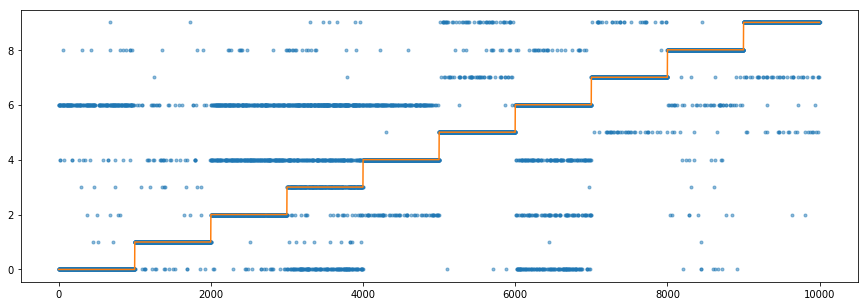

In [15]:
plt.figure(figsize=(15,5))
plt.plot(y2e,'.',alpha=0.5)
plt.plot(y2)

## Possible problem: different means and variances of each of the 784 data dimensions

Text(0.5,1,'Standard Deviations')

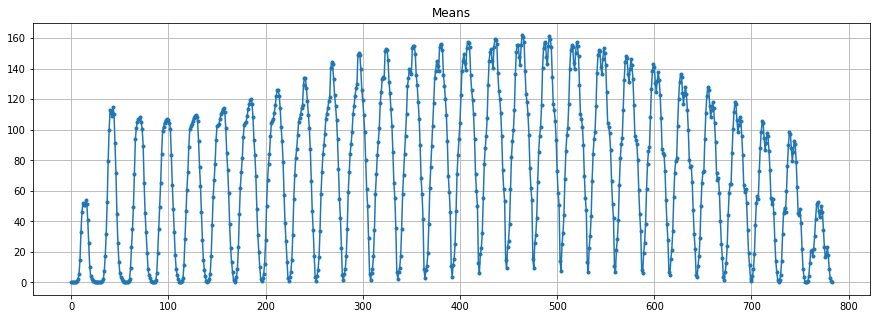

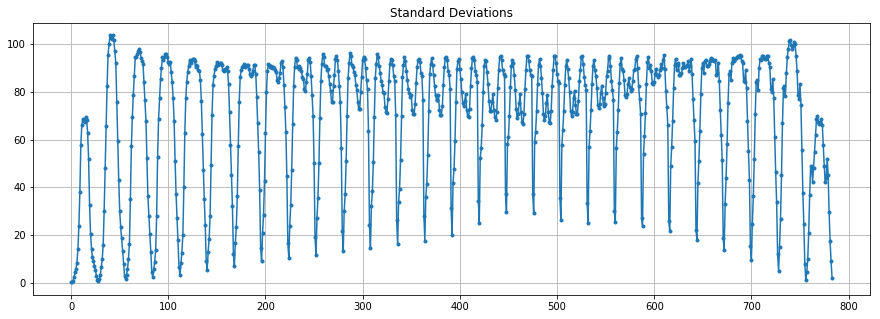

In [16]:
m=np.mean(X1,axis=0)
plt.figure(figsize=(15,5))
plt.plot(m,'.-')
plt.grid(True)
plt.title('Means')

s=np.std(X1,axis=0)
plt.figure(figsize=(15,5))
plt.plot(s,'.-')
plt.grid(True)
plt.title('Standard Deviations')


## Pre-process data (0 mean and unit variance in each dimension)

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler().fit(X1)
X1s=sc.transform(X1)
X2s=sc.transform(X2)

In [18]:
sgd=SGDClassifier().fit(X1s,y1)
y2e=sgd.predict(X2s)

C:\Users\ruben\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [19]:

print(confusion_matrix(y2,y2e))
print('Total number of erros %d (in %d)'%(np.sum(y2!=y2e),X2.shape[0]))

[[761   4  12  75   6   0 124   0  18   0]
 [  1 944   4  35   5   0  10   0   1   0]
 [ 10   1 708  17 121   0 132   0  11   0]
 [ 30  10  13 865  30   0  49   0   3   0]
 [  1   0 128  56 702   0 112   0   1   0]
 [  1   0   0   0   0 905   2  50  12  30]
 [131   2 110  75  85   0 559   0  38   0]
 [  0   0   0   0   0  39   0 930   2  29]
 [  5   1   3  15   3   1  33   5 934   0]
 [  0   0   0   2   0  15   1  47   1 934]]
Total number of erros 1758 (in 10000)


## Pre-process data with PCA - use different values for total variance
## Repeat the process with the normalized data (StandarScaler) to check if it is better

In [20]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.9,whiten=True).fit(X1)
X1p=pca.transform(X1)
X2p=pca.transform(X2)
print('Nº of Principal Components kept: %d'%X1p.shape[1])

Nº of Principal Components kept: 84


In [21]:
sgd=SGDClassifier().fit(X1p,y1)
y2e=sgd.predict(X2p)
print(confusion_matrix(y2,y2e))
print('Total number of erros %d (in %d)'%(np.sum(y2!=y2e),X2.shape[0]))

[[775   4  26  73   8   1  93   0  20   0]
 [  5 949  10  24   5   0   4   1   2   0]
 [ 18   3 708  11 163   0  83   0  14   0]
 [ 19  12  21 863  34   0  49   0   2   0]
 [  2   1 100  52 738   0 100   0   7   0]
 [  4   0   2   3   0 905   3  48  11  24]
 [130   5 138  57 128   0 507   0  35   0]
 [  1   0   0   0   0  43   1 917   0  38]
 [  2   1   5  15   6   7  24   6 934   0]
 [  3   0   0   0   0  16   2  35   2 942]]
Total number of erros 1762 (in 10000)


# Binary classification problem (positives are class 3 - dresses)

### Change labels

In [22]:
y1b=(y1==3)*1
y2b=(y2==3)*1

### Train and test

In [23]:
sgd=SGDClassifier().fit(X1p,y1b)
y2e=sgd.predict(X2p)
print(confusion_matrix(y2b,y2e))
print('Total number of erros %d (in %d)'%(np.sum(y2b!=y2e),y2b.shape[0]))

[[8858  142]
 [ 227  773]]
Total number of erros 369 (in 10000)


In [24]:
r1=np.sum(y2e[y2b==1]==1)/(np.sum(y2e[y2b==1]==1)+np.sum(y2e[y2b==1]==0)) #recall
p1=np.sum(y2e[y2b==1]==1)/(np.sum(y2e[y2b==1]==1)+np.sum(y2e[y2b==0]==1)) #precision
f1=np.sum(y2e[y2b==0]==1)/(np.sum(y2e[y2b==0]==0)+np.sum(y2e[y2b==0]==1)) #fp-rate
print('Recall: %3f - Precision: %3f - FP-rate: %3f'%(r1,p1,f1))

Recall: 0.773000 - Precision: 0.844809 - FP-rate: 0.015778


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y2b,y2e))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9000
           1       0.84      0.77      0.81      1000

    accuracy                           0.96     10000
   macro avg       0.91      0.88      0.89     10000
weighted avg       0.96      0.96      0.96     10000



# Model Calibration (changing decision threshold)

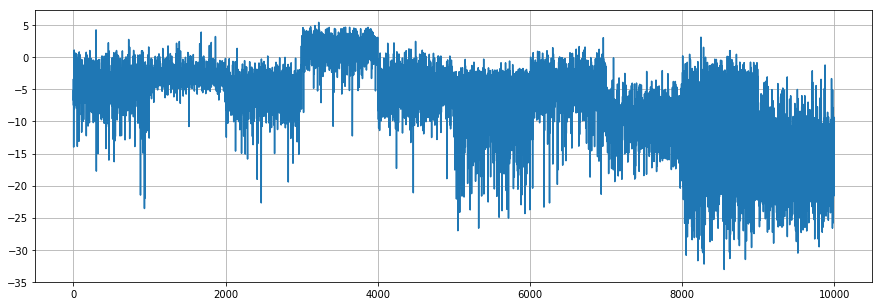

In [26]:
r2e=sgd.decision_function(X2p)
plt.figure(figsize=(15,5))
plt.plot(r2e)
plt.grid(True)

In [27]:
print(confusion_matrix(y2b,(r2e>=0)*1))#default threshold
print('Total number of erros %d (in %d)'%(np.sum(y2b!=(r2e>=0)*1),y2b.shape[0]))

[[8858  142]
 [ 227  773]]
Total number of erros 369 (in 10000)


## Change threshold - reduce the false negatives

In [28]:
lim2=-0.191
y2eB=(r2e>lim2)*1 #Acima positivo
print(confusion_matrix(y2b,y2eB))
print('Total number of erros %d (in %d)'%(np.sum(y2b!=y2eB),y2b.shape[0]))

[[8824  176]
 [ 201  799]]
Total number of erros 377 (in 10000)


In [29]:
r2=np.sum(ytest_predict[y2b==1]==1)/(np.sum(y2eB[y2b==1]==1)+np.sum(y2eB[y2b==1]==0))
p2=np.sum(y2eB[y2b==1]==1)/(np.sum(y2eB[y2b==1]==1)+np.sum(y2eB[y2b==0]==1))
f2=np.sum(y2eB[y2b==0]==1)/(np.sum(y2eB[y2b==0]==0)+np.sum(y2eB[y2b==0]==1))
print('Recall: %3f - Precision: %3f - FP-rate: %3f'%(r2,p2,f2))

Recall: 0.799000 - Precision: 0.819487 - FP-rate: 0.019556


In [30]:
lim3=-1.75
y2eC=(r2e>lim3)*1
print(confusion_matrix(y2b,y2eC))
print('Total number of erros %d (in %d)'%(np.sum(y2b!=y2eC),y2.shape[0]))
r3=np.sum(y2eC[y2b==1]==1)/(np.sum(y2eC[y2b==1]==1)+np.sum(y2eC[y2b==1]==0))
p3=np.sum(y2eC[y2b==1]==1)/(np.sum(y2eC[y2b==1]==1)+np.sum(y2eC[y2b==0]==1))
f3=np.sum(y2eC[y2b==0]==1)/(np.sum(y2eC[y2b==0]==0)+np.sum(y2eC[y2b==0]==1))
print('Recall: %3f - Precision: %3f - FP-rate: %3f'%(r3,p3,f3))

[[8208  792]
 [  57  943]]
Total number of erros 849 (in 10000)
Recall: 0.943000 - Precision: 0.543516 - FP-rate: 0.088000


# ROC curve + Precision-recall curve - 3 thresholds

In [32]:
import  sklearn.metrics as skm

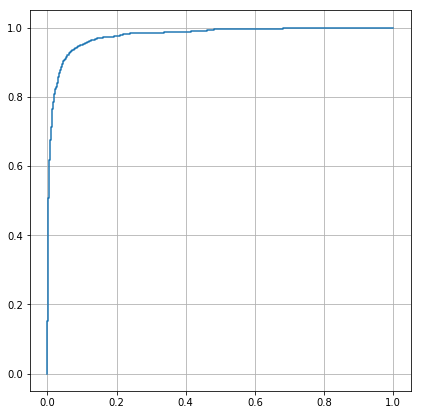

In [33]:
fp,tp,t=skm.roc_curve(y2b,r2e)

plt.figure(figsize=(7,7))
plt.plot(fp,tp)


plt.axis('scaled')
plt.grid(True)

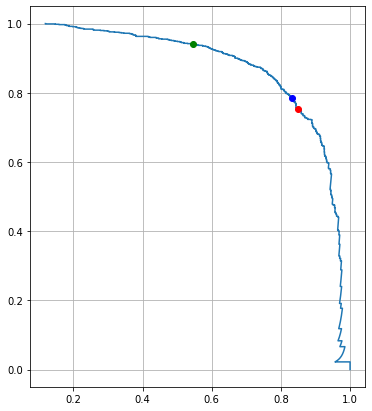

In [74]:
pre,rec,lim=skm.precision_recall_curve(y2b,r2e)
plt.figure(figsize=(7,7))
plt.plot(pre,rec)
plt.plot(p1,r1,'or')

plt.plot(p2,r2,'ob')
plt.plot(p3,r3,'og')

plt.axis('scaled')
plt.grid(True)

## Precion, Recall and F-score  for the thresholds used

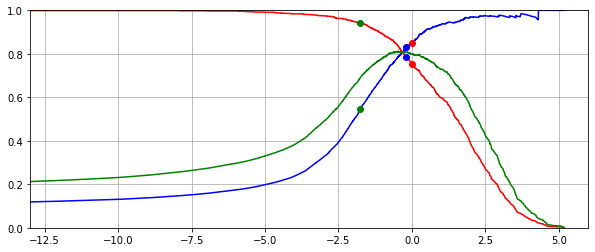

In [80]:
plt.figure(figsize=(10,4))
plt.plot(lim,pre[:-1],'b')
plt.plot(lim,rec[:-1],'r')

fsc=2*pre*rec/(pre+rec)

plt.plot(lim,fsc[:-1],'g')

plt.plot(0,p1,'or')
plt.plot(0,r1,'or')
plt.plot(lim2,p2,'ob')
plt.plot(lim2,r2,'ob')
plt.plot(lim3,p3,'og')
plt.plot(lim3,r3,'og')

plt.axis([np.floor(lim.min()),np.ceil(lim.max()),0,1])
plt.grid(True)


In [79]:
np.floor(lim.min())

-13.0

## Model Comparison (try another classifier)

In [85]:
from sklearn.ensemble import RandomForestClassifier
RandF=RandomForestClassifier().fit(X1p,y1b)
y2f=RandF.predict(X2p)
print(confusion_matrix(y2b,y2f))
print('Total number of erros %d (in %d)'%(np.sum(y2b!=y2f),y2b.shape[0]))

[[8945   55]
 [ 232  768]]
Total number of erros 287 (in 10000)


In [122]:
r2f=RandF.predict_proba(X2p)[:,1]
yB=(r2f>0.5)*1#default threshold
print(confusion_matrix(y2b,yB))
print('Total number of erros %d (in %d)'%(np.sum(y2b!=yB),y2b.shape[0]))

[[8945   55]
 [ 232  768]]
Total number of erros 287 (in 10000)


Recall: 0.785000 - Precision: 0.832450 - FP-rate: 0.017556


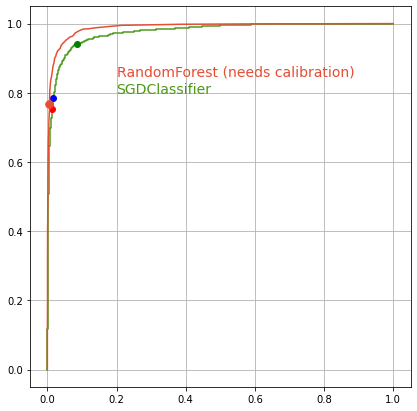

In [123]:
fp,tp,t=skm.roc_curve(y2b,r2e)

plt.figure(figsize=(7,7))
plt.plot(fp,tp,color=[.3,.6,.1])
plt.text(.2,.8,'SGDClassifier',fontsize=14,color=[.3,.6,.1])

plt.plot(f1,r1,'or')
plt.plot(f2,r2,'ob')
plt.plot(f3,r3,'og')

fp2,tp2,t2=skm.roc_curve(y2b,r2f)
r4=np.sum(yB[y2b==1]==1)/(np.sum(yB[y2b==1]==1)+np.sum(yB[y2b==1]==0))
p4=np.sum(yB[y2b==1]==1)/(np.sum(yB[y2b==1]==1)+np.sum(yB[y2b==0]==1))
f4=np.sum(yB[y2b==0]==1)/(np.sum(yB[y2b==0]==0)+np.sum(yB[y2b==0]==1))
print('Recall: %3f - Precision: %3f - FP-rate: %3f'%(r2,p2,f2))
plt.plot(fp2,tp2,color=[0.9,0.3,0.2])
plt.text(.2,.85,'RandomForest (needs calibration)',fontsize=14,color=[0.9,0.3,0.2])

plt.plot(f4,r4,'.',ms=15,color=[0.9,0.3,0.2])
plt.axis('scaled')
plt.grid(True)

In [ ]:
# Defining function for preprocessing CIFAR-10 dataset
def pre_process_cifar10():
    # Loading whole CIFAR-10 dataset
    x_train, y_train, x_test, y_test = whole_cifar10()

    # Normalizing whole data by dividing /255.0
    x_train /= 255.0
    x_test /= 255.0

    # Preparing data for training, validation and testing
    # Data for validation is taken with 1000 examples from training dataset in range from 49000 to 50000
    batch_mask = list(range(49000, 50000))
    x_validation = x_train[batch_mask]  # (1000, 32, 32, 3)
    y_validation = y_train[batch_mask]  # (1000,)
    # Data for training is taken with first 49000 examples from training dataset
    batch_mask = list(range(49000))
    x_train = x_train[batch_mask]  # (49000, 32, 32, 3)
    y_train = y_train[batch_mask]  # (49000,)
    # Data for testing is taken with first 1000 examples from testing dataset
    batch_mask = list(range(1000))
    x_test = x_test[batch_mask]  # (1000, 32, 32, 3)
    y_test = y_test[batch_mask]  # (1000,)

    # Normalizing data by subtracting mean image and dividing by standard deviation
    # Subtracting the dataset by mean image serves to center the data
    # It helps for each feature to have a similar range and gradients don't go out of control
    # Calculating mean image from training dataset along the rows by specifying 'axis=0'
    mean_image = np.mean(x_train, axis=0)  # numpy.ndarray (32, 32, 3)

    # Calculating standard deviation from training dataset along the rows by specifying 'axis=0'
    std = np.std(x_train, axis=0)  # numpy.ndarray (32, 32, 3)
    # Saving calculated 'mean_image' and 'std' into 'pickle' file
    # We will use them when preprocess input data for classifying
    # We will need to subtract and divide input image for classifying
    # As we're doing now for training, validation and testing data
    dictionary = {'mean_image': mean_image, 'std': std}
    with open('mean_and_std.pickle', 'wb') as f_mean_std:
        pickle.dump(dictionary, f_mean_std)

    # Subtracting calculated mean image from datasets
    x_train -= mean_image
    x_validation -= mean_image
    x_test -= mean_image

    # Dividing then every dataset by standard deviation
    x_train /= std
    x_validation /= std
    x_test /= std

    # Transposing every dataset to make channels come first
    x_train = x_train.transpose(0, 3, 1, 2)  # (49000, 3, 32, 32)
    x_test = x_test.transpose(0, 3, 1, 2)  # (1000, 3, 32, 32)
    x_validation = x_validation.transpose(0, 3, 1, 2)  # (1000, 3, 32, 32)

    # Returning result as dictionary
    d_processed = {'x_train': x_train, 'y_train': y_train,
                   'x_validation': x_validation, 'y_validation': y_validation,
                   'x_test': x_test, 'y_test': y_test}

    # Returning dictionary
    return d_processed